In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

device = torch.device('cpu')

%matplotlib inline

# Linear Regression

### 1. Problem with Noisy Data???

In [2]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()
x = torch.tensor(diabetes['data'][:, np.newaxis, 2], dtype=torch.float)
y = torch.tensor(diabetes['target'][:], dtype=torch.float)
# y = 2 * x + 1000

x.shape, y.shape

(torch.Size([442, 1]), torch.Size([442]))

In [3]:
# define model
model = nn.Linear(1, 1, bias=True)
mse_loss = nn.MSELoss(reduction='mean')

optimizer = torch.optim.SGD(params=model.parameters(), lr=0.9)

# train the model
losses = []
for i in range(1000):
    y_pred = model(x)
    loss = mse_loss(y_pred, y)
    losses.append(loss.data.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
#     print(list(model.parameters())[0].data, list(model.parameters())[1].data)
    
# make prediction
with torch.no_grad():
    y_pred = model(x).view(-1).numpy()

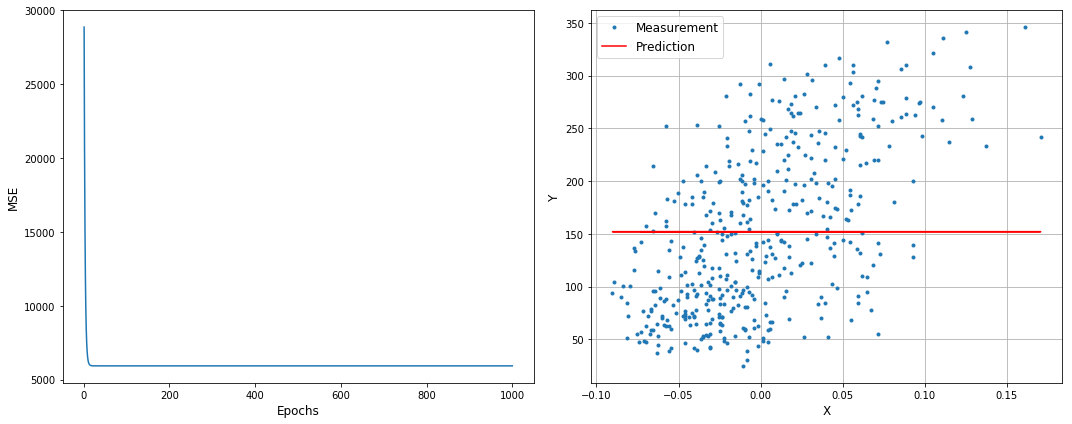

In [4]:
# visualization
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
ax[0].plot(range(1, len(losses) + 1), losses)
ax[0].set_xlabel('Epochs', fontsize=12)
ax[0].set_ylabel('MSE', fontsize=12)

ax[1].plot(x.numpy(), y.numpy(), '.', label='Measurement')
ax[1].plot(x.numpy(), y_pred, 'r-', label='Prediction')
ax[1].set_xlabel('X', fontsize=12)
ax[1].set_ylabel('Y', fontsize=12)
ax[1].grid(True)
ax[1].legend(fontsize=12)
plt.tight_layout()
plt.show()

### 2. Work OK

In [5]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()
x = torch.tensor(diabetes['data'][:, np.newaxis, 2], dtype=torch.float)
y = 2 * x + 1

x.shape, y.shape

(torch.Size([442, 1]), torch.Size([442, 1]))

In [6]:
# define model
model = nn.Linear(1, 1, bias=True)
mse_loss = nn.MSELoss(reduction='mean')

optimizer = torch.optim.SGD(params=model.parameters(), lr=0.9)

# train the model
losses = []
for i in range(1000):
    y_pred = model(x)
    loss = mse_loss(y_pred, y)
    losses.append(loss.data.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
#     print(list(model.parameters())[0].data, list(model.parameters())[1].data)
    
# make prediction
with torch.no_grad():
    y_pred = model(x).view(-1).numpy()

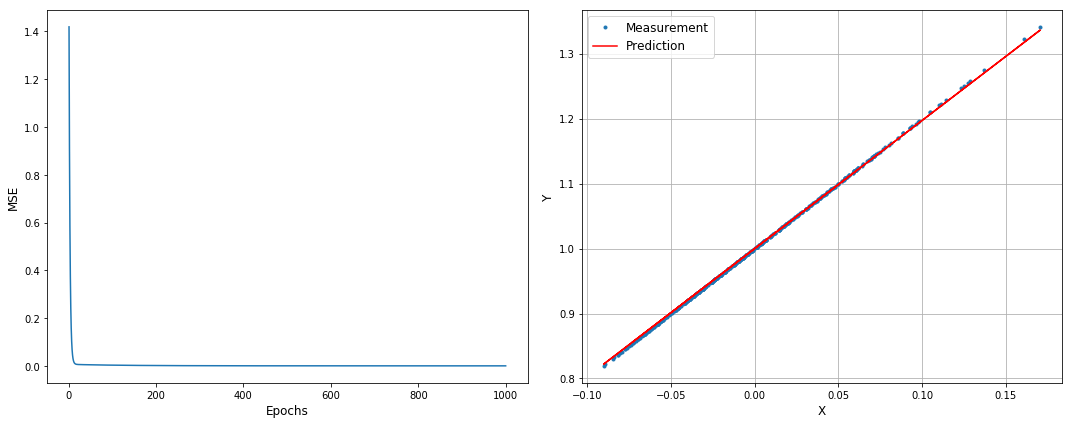

In [7]:
# visualization
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
ax[0].plot(range(1, len(losses) + 1), losses)
ax[0].set_xlabel('Epochs', fontsize=12)
ax[0].set_ylabel('MSE', fontsize=12)

ax[1].plot(x.numpy(), y.numpy(), '.', label='Measurement')
ax[1].plot(x.numpy(), y_pred, 'r-', label='Prediction')
ax[1].set_xlabel('X', fontsize=12)
ax[1].set_ylabel('Y', fontsize=12)
ax[1].grid(True)
ax[1].legend(fontsize=12)
plt.tight_layout()
plt.show()

# Logistic Regression